<a href="https://colab.research.google.com/github/Ashayan97/keras_imdb_dataset_review_positivity-/blob/master/IMDB_Data_Set_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
!pip install numpy==1.16.1

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) =imdb.load_data(num_words=10000)
train_data.shape

(25000,)

In [0]:
from keras import models
from keras import layers
import numpy as np

In [0]:

word_index = imdb.get_word_index()
train_data[0]
# index=word_index["hi"]
# print(index)
# word_index["how"]
def encode_imdb(input_text,word_index):
  encoded=[]
  for i in input_text.split() :
    encoded.append(word_index[i]+3)
  return encoded
text=input()

encoded_text=encode_imdb(text,word_index)
encoded_text
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in encoded_text]
)
print(decoded_review)

hi how are you
hi how are you


In [0]:
def vectorize_sequences(sequences, dimension=10000) :
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences) :
    results[i,sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray (train_labels).astype('float32')
y_test = np.asarray (test_labels).astype('float32')

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model_test1 = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 176us/step - loss: 0.4826 - acc: 0.7865 - val_loss: 0.3436 - val_acc: 0.8773
Epoch 2/10
15000/15000 [==============================] - 2s 112us/step - loss: 0.2778 - acc: 0.9014 - val_loss: 0.2883 - val_acc: 0.8906
Epoch 3/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.1982 - acc: 0.9313 - val_loss: 0.3475 - val_acc: 0.8572
Epoch 4/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.1600 - acc: 0.9441 - val_loss: 0.2956 - val_acc: 0.8821
Epoch 5/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.1264 - acc: 0.9578 - val_loss: 0.2958 - val_acc: 0.8851
Epoch 6/10
15000/15000 [==============================] - 2s 113us/step - loss: 0.0970 - acc: 0.9692 - val_loss: 0.3296 - val_acc: 0.8805
Epoch 7/10
15000/15000 [==============================] - 2s 113us/step - 

In [0]:
history_dict = model_test1.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']
print(history_dict['acc'])
print(history_dict['val_acc'])

[0.7864666665712993, 0.9014000002861023, 0.9312666667620341, 0.9441333332061768, 0.9577999997138977, 0.9691999998092652, 0.9722666668256124, 0.9823999997138977, 0.9882666664759318, 0.9872666664759318]
[0.8773000001907348, 0.8906000000953674, 0.8571999998092651, 0.8821000001907349, 0.8851000003814697, 0.8804999999046326, 0.8810000000953674, 0.8680999998092651, 0.8651999998092651, 0.8777000000953674]


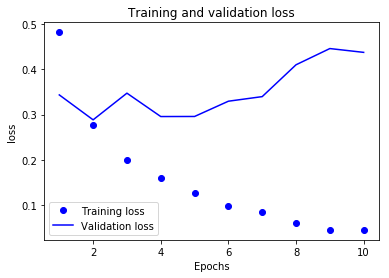

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [0]:
results=model.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 81us/step


[0.48082842883586885, 0.86172]

In [0]:

from keras import regularizers
model2 = models.Sequential()
model2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model2_test = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 118us/step - loss: 0.5671 - acc: 0.7761 - val_loss: 0.4263 - val_acc: 0.8623
Epoch 2/10
15000/15000 [==============================] - 2s 111us/step - loss: 0.3548 - acc: 0.8985 - val_loss: 0.3765 - val_acc: 0.8750
Epoch 3/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.2910 - acc: 0.9199 - val_loss: 0.3735 - val_acc: 0.8762
Epoch 4/10
15000/15000 [==============================] - 2s 116us/step - loss: 0.2524 - acc: 0.9377 - val_loss: 0.3449 - val_acc: 0.8878
Epoch 5/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.2410 - acc: 0.9370 - val_loss: 0.3499 - val_acc: 0.8858
Epoch 6/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.2255 - acc: 0.9449 - val_loss: 0.3697 - val_acc: 0.8821
Epoch 7/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.2115 - acc: 0.9507 - val_loss: 0.3927 - 

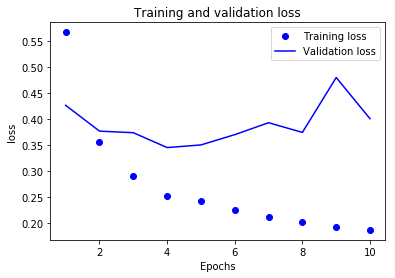

In [0]:
history_dict = model2_test.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']

import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [0]:
model2.fit(x_train,
                   y_train,
                   epochs=4,
                   batch_size=512
                   )

Epoch 1/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2743 - acc: 0.9250
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2419 - acc: 0.9326
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2301 - acc: 0.9395
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2237 - acc: 0.9420


In [0]:
results=model2.evaluate(x_test,y_test)
results

25000/25000 [==============================] - 2s 82us/step


[0.470287821598053, 0.85336]

In [0]:
from keras import regularizers
model3 = models.Sequential()
model3.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu', input_shape=(10000,)))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001) , activation='relu'))
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model3_test = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=10,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 127us/step - loss: 0.6646 - acc: 0.6835 - val_loss: 0.4872 - val_acc: 0.8571
Epoch 2/10
15000/15000 [==============================] - 2s 114us/step - loss: 0.4886 - acc: 0.8271 - val_loss: 0.3870 - val_acc: 0.8825
Epoch 3/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.3952 - acc: 0.8733 - val_loss: 0.3538 - val_acc: 0.8836
Epoch 4/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.3443 - acc: 0.9021 - val_loss: 0.3537 - val_acc: 0.8811
Epoch 5/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.3018 - acc: 0.9163 - val_loss: 0.3518 - val_acc: 0.8837
Epoch 6/10
15000/15000 [==============================] - 2s 115us/step - loss: 0.2742 - acc: 0.9275 - val_loss: 0.3560 - val_acc: 0.8859
Epoch 7

In [0]:
history_dict = model3_test.history
history_dict.keys()
[u'acc', u'loss' , u'val_acc', u'val_loss']


['acc', 'loss', 'val_acc', 'val_loss']

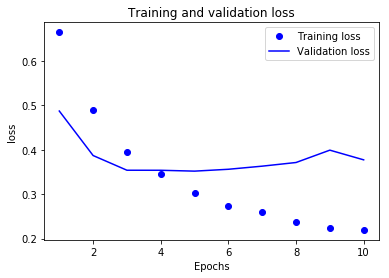

In [0]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs= range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo' , label='Training loss')
plt.plot(epochs, val_loss_values, 'b' , label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [0]:
model4_test = model3.fit(x_train,
                   y_train,
                   epochs=3,
                   batch_size=512
                        )

Epoch 1/3
25000/25000 [==============================] - 2s 74us/step - loss: 0.2349 - acc: 0.9424
Epoch 2/3
25000/25000 [==============================] - 2s 72us/step - loss: 0.2351 - acc: 0.9421
Epoch 3/3
25000/25000 [==============================] - 2s 73us/step - loss: 0.2278 - acc: 0.9464


In [0]:
results=model3.evaluate(x_train,y_train)
results

25000/25000 [==============================] - 2s 83us/step


[0.16547918007612228, 0.97248]

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
text=input()
encode_data=encode_imdb(text,word_index)
data_to_predict=vectorize_sequences(encode_data)
data_to_predict


i hate this movie


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])